## Extracting Data

In [11]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# load data
wine=datasets.load_wine()
# print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

## Plotting Data

In [12]:
# adding target value in seperate dataframe for plotting purpose
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
df = data[['alcohol','flavanoids','color_intensity','ash','target']]

In [13]:
# define plotting function
def myplotGrid(dfu, y):
  sns.pairplot(dfu, hue='target', palette='tab10')

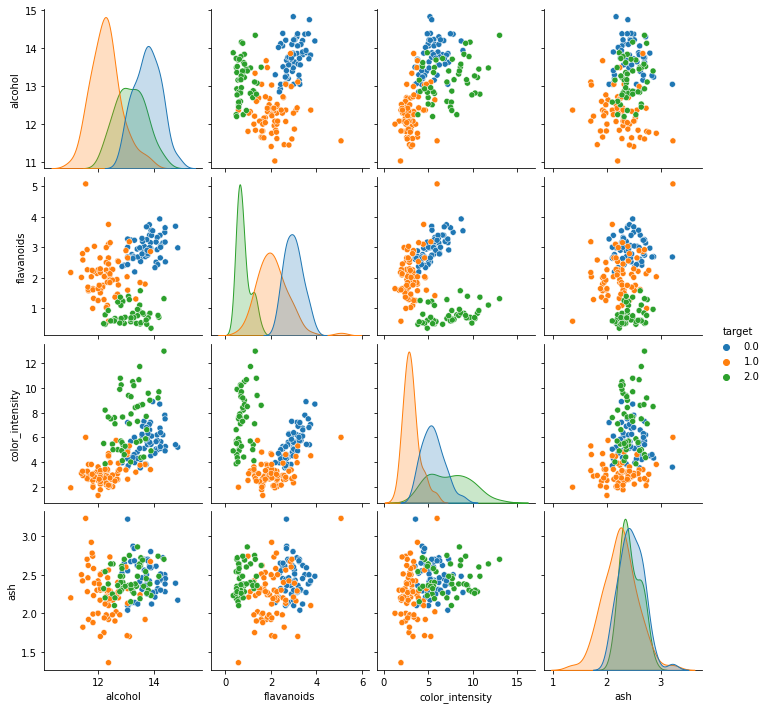

In [14]:
# run the plotting function
myplotGrid(df, y)

## Adding noise to Data

In [15]:
# noise code 
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)

## kNN using skLearn for comparison

In [16]:
# Library imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Spliting training and test data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

k = 7

# Running kNN sklearn function
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)

# Printing accuracy
print("accuracy= ",accuracy_score(y_test,y_prediction))


accuracy=  0.9444444444444444


# Defining kNN prediction function and spliting train and test data

In [17]:
# mykNN code

# Library imports
from scipy.stats import mode
from numpy.random import randint
import seaborn as sn
import statistics

# Euclidean Distance function
def euclideanDistance(point1, point2):
  distance = np.sqrt(np.sum(np.subtract(point1,point2)**2))
  return distance

# Manhattan Distance function
def manhattanDistance(point1, point2):
  distance = sum(abs(val1-val2) for val1, val2 in zip(point1,point2))
  return distance

# Prediction function
def predict(X, y, X_, k, distanceFun):
  '''
    Returns a list of predicted labels.
      
      Parameters:
        
        X (list): list of train input
        y (list): list of train target
        X_(list): list of test input
        k(int): value of k
        distanceFun(list): string of list of distance calculating function

      Returns:
        
        predict_labels (list): list of predicted labels
  '''
  
  # Defining list for predicted labels
  predict_labels = []
  
  # Iterating on test input and calculating distance from items in train input
  for items in X_:
    
    pointsDistance = []
    
    # Checking for distance function preference
    for i in range(len(X)):
      if(distanceFun == 'manhattan'):
        distances = manhattanDistance(np.array(X[i]), items)
      elif(distanceFun == 'euclidean'):
        distances = euclideanDistance(np.array(X[i]), items)
      
      pointsDistance.append(distances)
    
    pointsDistance = np.array(pointsDistance)
    distance = np.argsort(pointsDistance)[:k]

    # Storing predicted labels
    labels = y[distance]
    labels_ = mode(labels)
    labels_ = labels_.mode[0]
    predict_labels.append(labels_)
  
  return predict_labels

# Dividing input and labels into train and test data 
train_idx = xxx = randint(0, 178, 120)
X_train = X[train_idx]
y_train = y[train_idx]

test_idx = xxx = randint(0, 150, 58)
X_test = X[test_idx]
y_test = y[test_idx]

# Calling the prediction function
y_pred = predict(X_train, y_train, X_test, 4, 'euclidean')

# Evaluation matrices functions

Accuracy:  0.9655172413793104

Confusion Matrix:


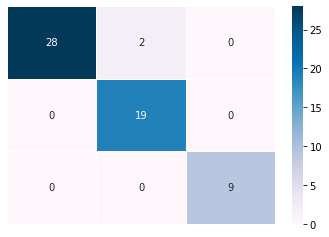

In [18]:
#######   Confusion Matrix function   #######
def confusionFunc(test, pred):
  '''
    Show the confusion matrix and return matrix.
      
      Parameters:
        
        test (list): list of test target
        pred (list): list of predicted labels

      Output:
        
        Returns the matrix.
  '''
  unique = set(test)

  # Defining matrix
  matrix = [list() for x in range(len(unique))]
  
  # Converting list to matrix
  for i in range(len(unique)):
    matrix[i] = [0 for x in range(len(unique))]
  
  lookup = dict()
  
  for i, value in enumerate(unique):
    lookup[value] = i
  
  for i in range(len(test)):
    x = lookup[test[i]]
    Y = lookup[pred[i]]
    matrix[Y][x] += 1
  
  # Making heatmap of the matrix 
  sn.heatmap(matrix, linecolor='white', linewidths=0.5, xticklabels='' , yticklabels='', annot=True, cmap='PuBu')
  
  # Show the resulting plot
  plt.show()

  return matrix


#######   Accuracy function   #######
def accuracyFunc(test, pred):
  '''
    Returns the accuracy.
      
      Parameters:
        
        test (list): list of test target
        pred (list): list of predicted labels

      Output:
        
        returns the accuracy.
  '''
  correct = 0
  
  # getting count of correct predictions
  for i in range(len(test)):
    if (test[i] == pred[i]):
      correct += 1
  
  # Dividing correct by total to get accuracy 
  accuracy = correct/float(len(test))
  
  # returning the resulting accuracy
  return accuracy

print("Accuracy: ", accuracyFunc(y_test, y_pred))

print("\nConfusion Matrix:")
confusionFunc(y_test, y_pred)
print(" ")

## Testing evaluation matrices

Self Implemented accuarcy score:  0.6666666666666666
sklearn implemented accuracy:  0.6666666666666666


Self Implemented confusion matrix


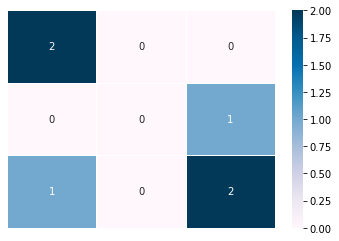


Sklearn Implemented confusion matrix


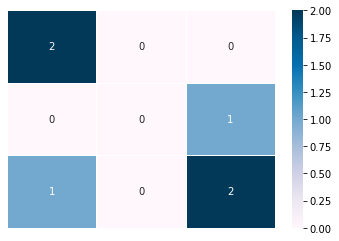

In [19]:
# test evaluation code against sklearn.matrices

# evaluation data
e_y_test = [2, 0, 2, 2, 0, 1]
e_y_pred = [0, 0, 2, 2, 0, 2]


# self implemented accuracy
true = 0
for i in range(len(e_y_test)):
  if (e_y_test[i] == e_y_pred[i]):
    true += 1
acc = true/float(len(e_y_test))
print("Self Implemented accuarcy score: ", acc)

# sklearn implemented accuracy
sk_acc = accuracy_score(e_y_test, e_y_pred)
print("sklearn implemented accuracy: ", sk_acc)


# self implemented confusion matrix
unique = set(e_y_test)
matrix = [list() for x in range(len(unique))]
for i in range(len(unique)):
  matrix[i] = [0 for x in range(len(unique))]
lookup = dict()
for i, value in enumerate(unique):
  lookup[value] = i
for i in range(len(e_y_test)):
  x = lookup[e_y_test[i]]
  Y = lookup[e_y_pred[i]]
  matrix[Y][x] += 1

matrix = [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
sn.heatmap(matrix, linecolor='white', linewidths=0.5, xticklabels='' , yticklabels='', annot=True, cmap='PuBu')
print("\n\nSelf Implemented confusion matrix")
plt.show()

#sklearn implemented confusion matrix
conf = confusion_matrix(e_y_test, e_y_pred)
sn.heatmap(conf, linecolor='white', linewidths=0.5, xticklabels='' , yticklabels='', annot=True, cmap='PuBu')
print("\nSklearn Implemented confusion matrix")
plt.show()

# Cross-Validating kNN

In [20]:
# parameters for testing code
nFolds = 5
np.random.seed(mySeed)

# Creates an array of random permutation of indices between 0 and the length of the X data.
# The indices are then split up into (folds) folds
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, nFolds)

k=[2, 3, 4, 5, 6]

In [21]:
# myNestedCrossVal code
def myNestedCrossVal(X, y, folds, k, distanceAlgo, mySeed):
  '''
    Runs knn on multiple fold of data & prints out the evaluation matrices
      
      Parameters:
        
        X (list): list of features
        y (list): list of target
        folds (int): number of folds
        k (list): list of integers varying for number of neighbors
        distanceAlgo (list): String list defining the distance algorithm
        mySeed (int): random seed

      Output:
        
        returns the average accuracy and final matrix
  '''
  # average accuracies list
  accAverageList = []
  # resulting matrices list
  confAverageList = []

  for iFold in range(0,folds):
    testFold = indices[iFold]
    print('\n*** Iterration no.', iFold+1, "***")

    # Dividing data into train & test according to the fold number
    trainFold = indices[iFold][:]
    X_trainFold = X[trainFold]
    y_trainFold = y[trainFold]

    X_testFold = X[testFold]
    y_testFold = y[testFold]

    # Calling the prediction function
    y_predFold = predict(X_trainFold, y_trainFold, X_testFold, k[iFold], distanceAlgo[iFold%2])

    # Calling the accuracyFunc to calculate accuracy
    accFold = accuracyFunc(y_testFold, y_predFold)

    # Calling the confusionFunc to get the matrices
    confFold = confusionFunc(y_testFold, y_predFold)

    # Printing accuracy metrics
    print("k = ", k[iFold])
    print("Distance = ", distanceAlgo[iFold%2])
    print("accuracy = ", accFold)
    
    # Listing accuracy for calculation of average & stkdev
    accAverageList.append(accFold)
    
    # Listing matrices for calculating average and making confusion matrix
    confAverageList.append(confFold)

    remaining_folds = np.delete(range(0,folds), iFold)
    validationFold = indices[ remaining_folds[0] ]
  
  # Calculating Average accuracy
  accAverage = sum(accAverageList)/nFolds
  print("\nAverage accuracy:", accAverage)

  # Calculating Standard Deviation
  print("Standard deviation:", statistics.stdev(accAverageList))

  # Calculating the average matrix
  matrixFinal = confAverageList[nFolds-1]

  return accAverage, matrixFinal


## Average metrics for cross_validated data


*** Iterration no. 1 ***


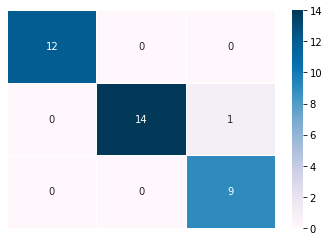

k =  2
Distance =  euclidean
accuracy =  0.9722222222222222

*** Iterration no. 2 ***


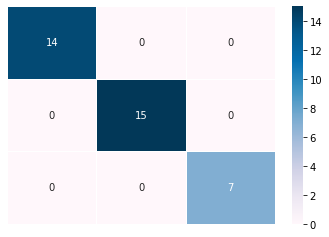

k =  3
Distance =  manhattan
accuracy =  1.0

*** Iterration no. 3 ***


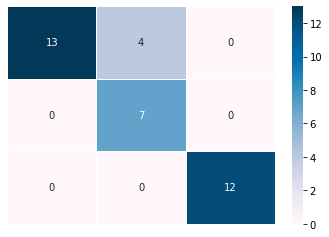

k =  4
Distance =  euclidean
accuracy =  0.8888888888888888

*** Iterration no. 4 ***


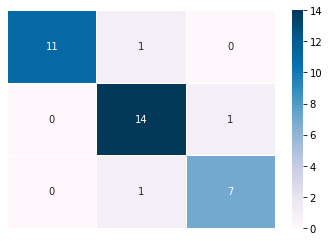

k =  5
Distance =  manhattan
accuracy =  0.9142857142857143

*** Iterration no. 5 ***


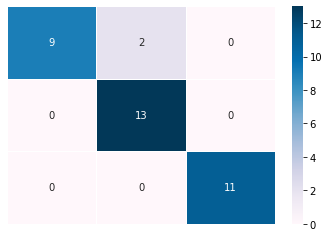

k =  6
Distance =  euclidean
accuracy =  0.9428571428571428

Average accuracy: 0.9436507936507936
Standard deviation: 0.044309602705421794


In [22]:
# evaluate clean data code
averageAccuracy, finalMatrix = myNestedCrossVal(X, y, nFolds, k, ['euclidean', 'manhattan'], mySeed)

## Average metrics for cross_validated noisy data


*** Iterration no. 1 ***


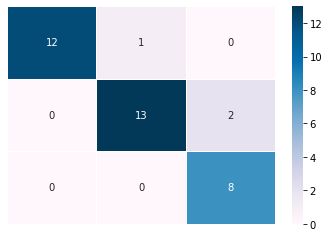

k =  2
Distance =  euclidean
accuracy =  0.9166666666666666

*** Iterration no. 2 ***


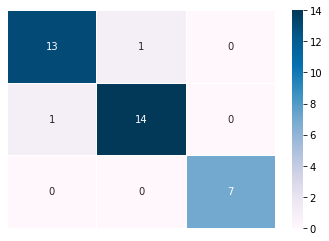

k =  3
Distance =  manhattan
accuracy =  0.9444444444444444

*** Iterration no. 3 ***


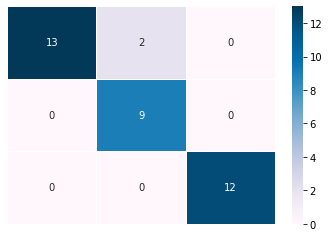

k =  4
Distance =  euclidean
accuracy =  0.9444444444444444

*** Iterration no. 4 ***


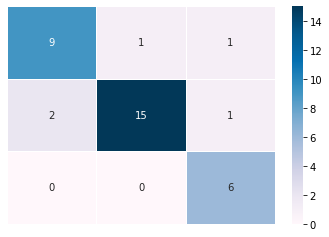

k =  5
Distance =  manhattan
accuracy =  0.8571428571428571

*** Iterration no. 5 ***


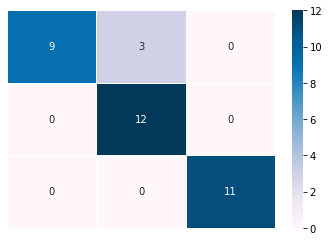

k =  6
Distance =  euclidean
accuracy =  0.9142857142857143

Average accuracy: 0.9153968253968253
Standard deviation: 0.03565073711284723


In [23]:
# evaluate noisy  data code
averageAccuracy_N, finalMatrix_N = myNestedCrossVal(XN, y, nFolds, k, ['euclidean', 'manhattan'], mySeed)

## Comparing of results

**clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9722  |  2 | euclidean  |
| 2 | 1.0  |  3 | manhattan  |
| 3 | 0.8888  |  4 | euclidean  |
| 4 | 0.9142  |  5 | manhattan  |
| 5 | 0.9428  |  6 | euclidean  |
| **total** | 0.9436 $\pm$ 0.0443 |   |    |

**noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9166  |  2 | euclidean  |
| 2 | 0.9444  |  3 | manhattan  |
| 3 | 0.9444  |  4 | euclidean  |
| 4 | 0.8571  |  5 | manhattan  |
| 5 | 0.9142  |  6 | euclidean  |
| **total** | 0.9153 $\pm$ 0.0356 |   |    |


# Summary with Average Accuracy, Error percentage and Confusion matrix

**CLEAN DATA**
Accuracy:  0.9436507936507936
Error percentage:  5.634920634920633
Confusion Matrix: 


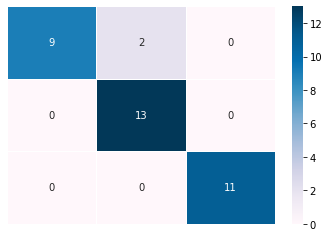



**NOISY DATA**
Accuracy:  0.9153968253968253
Error percentage:  8.46031746031747
Confusion Matrix: 


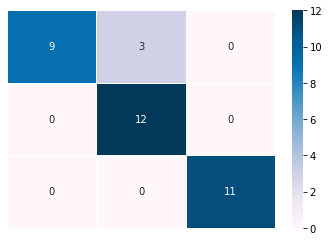

In [24]:
print('**CLEAN DATA**')
# clean data summary results
print("Accuracy: ", averageAccuracy)
print("Error percentage: ", 100 - (averageAccuracy * 100))
print("Confusion Matrix: ")
# Making heatmap of the matrix 
sn.heatmap(finalMatrix, linecolor='white', linewidths=0.5, xticklabels='' , yticklabels='', annot=True, cmap='PuBu')
plt.show()



print('\n\n**NOISY DATA**')
# clean data summary results
print("Accuracy: ", averageAccuracy_N)
print("Error percentage: ", 100 - (averageAccuracy_N * 100))
print("Confusion Matrix: ")
# Making heatmap of the matrix 
sn.heatmap(finalMatrix_N, linecolor='white', linewidths=0.5, xticklabels='' , yticklabels='', annot=True, cmap='PuBu')
plt.show()